# Análisis Exploratorio del Mercado Laboral Tecnológico

Este notebook presenta un análisis exploratorio de los datos del mercado laboral tecnológico, visualizando patrones y tendencias en ofertas de empleo y perfiles de desarrolladores.

In [1]:
# Ejemplo de la primera sección que puedes copiar (configuración e importaciones)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import sys
from IPython.display import display, Markdown, HTML
import warnings

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Establecer estilo general
plt.style.use('seaborn-v0_8-whitegrid')

# Paleta de colores moderna y profesional
colors = {
    'primary': '#3498db',       # Azul
    'secondary': '#2ecc71',     # Verde
    'accent': '#e74c3c',        # Rojo
    'neutral': '#95a5a6',       # Gris
    'highlight': '#f39c12',     # Naranja
    'purple': '#9b59b6',        # Púrpura
    'light_blue': '#3498db',    # Azul claro
    'dark_blue': '#2980b9',     # Azul oscuro
    'bg_light': '#f8f9fa'       # Fondo claro
}

# Configuración predeterminada para figuras
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20

# Set de colores para mapas cíclicos
color_palette = [colors['primary'], colors['secondary'], colors['accent'], 
                colors['purple'], colors['highlight']]
sns.set_palette(color_palette)

## Cargar los datos procesados

Primero cargaremos los datos que se han procesado mediante el pipeline ETL.

In [2]:
# Paths a los datos procesados
jobs_path = os.path.join('..', 'data', 'processed', 'jobs_processed.csv')
survey_path = os.path.join('..', 'data', 'processed', 'survey_processed.csv')
tech_counts_path = os.path.join('..', 'data', 'processed', 'technology_job_counts.csv')

# Cargar datos (verifica si el pipeline ETL ya se ha ejecutado)
try:
    jobs_df = pd.read_csv(jobs_path)
    survey_df = pd.read_csv(survey_path)
    tech_counts_df = pd.read_csv(tech_counts_path)
    print(f"Datos cargados exitosamente:\n- {len(jobs_df)} registros de empleos\n- {len(survey_df)} registros de encuestas")
except FileNotFoundError:
    print("No se encontraron los archivos de datos procesados.")
    print("Por favor ejecuta primero el pipeline ETL con 'python ../main.py' o 'python ../src/etl.py'")
    # Alternativa: importar y ejecutar ETL desde aquí
    import_etl = input("¿Deseas ejecutar el pipeline ETL ahora? (s/n): ")
    if import_etl.lower() == 's':
        sys.path.append('..')
        from src.etl import run_etl_pipeline
        jobs_df, survey_df = run_etl_pipeline()
        tech_counts_df = pd.read_csv(tech_counts_path)
        print("Pipeline ETL ejecutado exitosamente.")

Datos cargados exitosamente:
- 250 registros de empleos
- 3 registros de encuestas


## Exploración inicial de los datos

Veamos la estructura básica de nuestros datos.

In [3]:
# Estructura de los datos de empleo
print("== DATOS DE EMPLEOS ==")
print("\nPrimeras filas:")
display(jobs_df.head())
print("\nInformación:")
jobs_df.info()
print("\nEstadísticas descriptivas:")
display(jobs_df.describe())

== DATOS DE EMPLEOS ==

Primeras filas:


,titulo,empresa,ubicacion,fecha_publicacion,tipo_contrato,jornada,salario,salario_min,salario_max,salario_promedio,descripcion,categoria,tecnologias,url,id,fuente,fecha_extraccion,created_at,salary
0,Backend Developer Node.js,CloudNative,Barcelona,2025-05-06,Prácticas,Parcial,47000 - 63000 €,47000.0,63000.0,55000.0,Estamos buscando un profesional con experienci...,IT Jobs,"Jira, JavaScript, Scrum, Vue.js, CI/CD, Node.j...",https://www.ejemplo.com/job/1000,job-1000,Adzuna (Simulado),2025-05-18 13:11:27.076933,2025-05-06,55000.0
1,UX/UI Designer,GlobalTech,Málaga,2025-05-11,Freelance,Completa,46000 - 92000 €,46000.0,92000.0,69000.0,Estamos buscando un profesional con experienci...,UX/UI,"AWS, Git, Linux, GitHub Actions, Python, Agile...",https://www.ejemplo.com/job/1001,job-1001,Adzuna (Simulado),2025-05-18 13:11:27.076933,2025-05-11,69000.0
2,CTO,CloudNative,Madrid,2025-05-14,Completa,Completa,50000 - 85000 €,50000.0,85000.0,67500.0,Estamos buscando un profesional con experienci...,Desarrollo de Software,"Git, Angular, Docker, Agile, Scrum, Python",https://www.ejemplo.com/job/1002,job-1002,Adzuna (Simulado),2025-05-18 13:11:27.076933,2025-05-14,67500.0
3,Data Engineer,TechCorp,Barcelona,2025-05-17,Indefinido,Parcial,72000 - 120000 €,72000.0,120000.0,96000.0,Estamos buscando un profesional con experienci...,UX/UI,"Scrum, Jira, MySQL, GitHub Actions, Spring, An...",https://www.ejemplo.com/job/1003,job-1003,Adzuna (Simulado),2025-05-18 13:11:27.076933,2025-05-17,96000.0
4,Data Scientist,IntelliSoft,Híbrido (Barcelona),2025-05-13,Temporal,Completa,61000 - 77000 €,61000.0,77000.0,69000.0,Estamos buscando un profesional con experienci...,Desarrollo de Software,"Node.js, Scrum, GCP, Angular, Django",https://www.ejemplo.com/job/1004,job-1004,Adzuna (Simulado),2025-05-18 13:11:27.076933,2025-05-13,69000.0



Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titulo             250 non-null    object 
 1   empresa            250 non-null    object 
 2   ubicacion          250 non-null    object 
 3   fecha_publicacion  250 non-null    object 
 4   tipo_contrato      250 non-null    object 
 5   jornada            250 non-null    object 
 6   salario            250 non-null    object 
 7   salario_min        250 non-null    float64
 8   salario_max        250 non-null    float64
 9   salario_promedio   250 non-null    float64
 10  descripcion        250 non-null    object 
 11  categoria          250 non-null    object 
 12  tecnologias        250 non-null    object 
 13  url                250 non-null    object 
 14  id                 250 non-null    object 
 15  fuente             250 non-null    object 
 16  fecha_extrac

,salario_min,salario_max,salario_promedio,salary
count,250.000000,250.000000,250.000000,250.000000
mean,50316.000000,73660.000000,61988.000000,61988.000000
std,14310.391091,19932.828968,15756.679466,15756.679466
min,25000.000000,28000.000000,27000.000000,27000.000000
25%,38250.000000,60000.000000,51125.000000,51125.000000
50%,50000.000000,75000.000000,63000.000000,63000.000000
75%,62000.000000,87000.000000,72500.000000,72500.000000
max,75000.000000,120000.000000,96500.000000,96500.000000


In [4]:
# Estructura de los datos de encuestas
print("== DATOS DE ENCUESTAS ==")
print("\nPrimeras filas:")
display(survey_df.head())
print("\nInformación:")
survey_df.info()
print("\nEstadísticas descriptivas:")
display(survey_df.describe())

== DATOS DE ENCUESTAS ==

Primeras filas:


,respondent_id,country,age,education,years_coding,developer_type,languages,salary,currency,job_satisfaction,knows_r,knows_javascript,knows_html,knows_sql,knows_css,knows_python
0,1,Spain,28,Bachelor's degree,5,Full-stack developer,"['JavaScript', 'Python', 'SQL']",45000,EUR,7,False,True,False,True,False,True
1,2,Spain,35,Master's degree,10,Data scientist,"['Python', 'R', 'SQL']",58000,EUR,8,True,False,False,True,False,True
2,3,Spain,24,Bachelor's degree,2,Frontend developer,"['JavaScript', 'HTML', 'CSS']",35000,EUR,6,False,True,True,False,True,False



Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   respondent_id     3 non-null      int64 
 1   country           3 non-null      object
 2   age               3 non-null      int64 
 3   education         3 non-null      object
 4   years_coding      3 non-null      int64 
 5   developer_type    3 non-null      object
 6   languages         3 non-null      object
 7   salary            3 non-null      int64 
 8   currency          3 non-null      object
 9   job_satisfaction  3 non-null      int64 
 10  knows_r           3 non-null      bool  
 11  knows_javascript  3 non-null      bool  
 12  knows_html        3 non-null      bool  
 13  knows_sql         3 non-null      bool  
 14  knows_css         3 non-null      bool  
 15  knows_python      3 non-null      bool  
dtypes: bool(6), int64(5), object(5)
memory usage: 390.0+

,respondent_id,age,years_coding,salary,job_satisfaction
count,3.0,3.000000,3.000000,3.000000,3.0
mean,2.0,29.000000,5.666667,46000.000000,7.0
std,1.0,5.567764,4.041452,11532.562595,1.0
min,1.0,24.000000,2.000000,35000.000000,6.0
25%,1.5,26.000000,3.500000,40000.000000,6.5
50%,2.0,28.000000,5.000000,45000.000000,7.0
75%,2.5,31.500000,7.500000,51500.000000,7.5
max,3.0,35.000000,10.000000,58000.000000,8.0


## Análisis de las ofertas de empleo

Exploremos las características principales de las ofertas de empleo en el sector tecnológico.

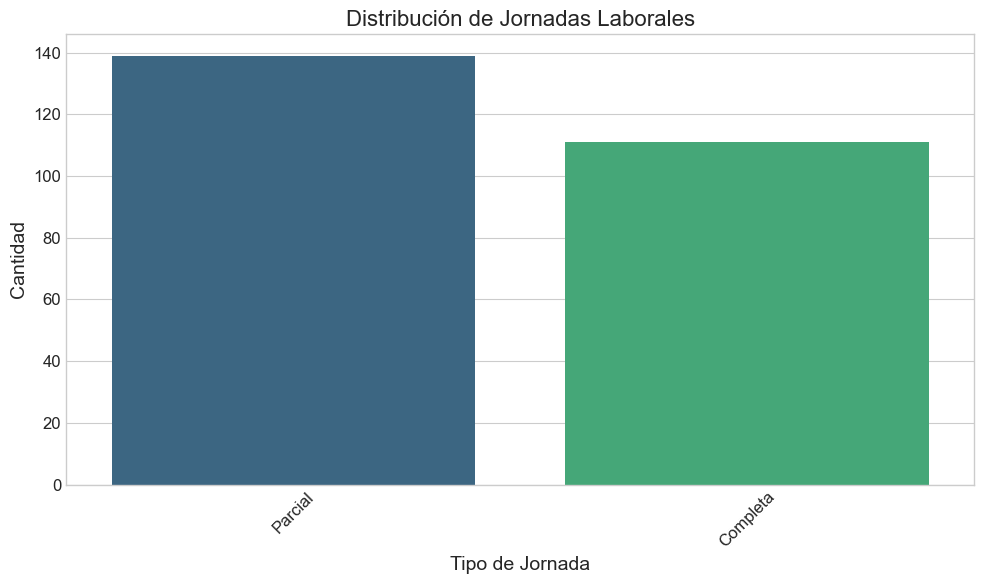

In [5]:
# Distribución de jornadas laborales
plt.figure(figsize=(10, 6))
job_types = jobs_df['jornada'].value_counts()
# Versión actualizada que evita la advertencia
sns.barplot(x=job_types.index, y=job_types.values, hue=job_types.index, palette='viridis', legend=False)
plt.title('Distribución de Jornadas Laborales', fontsize=16)
plt.xlabel('Tipo de Jornada', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

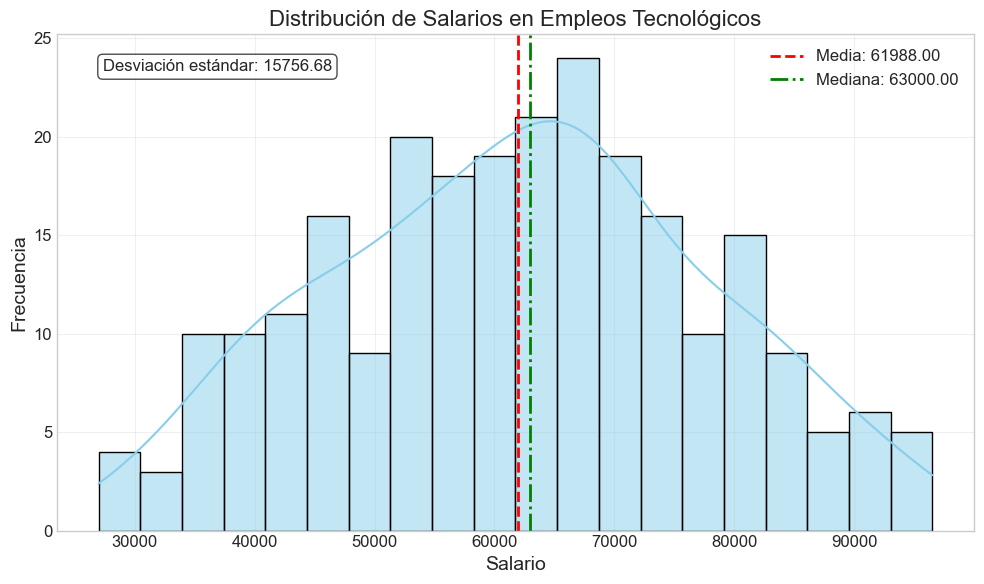

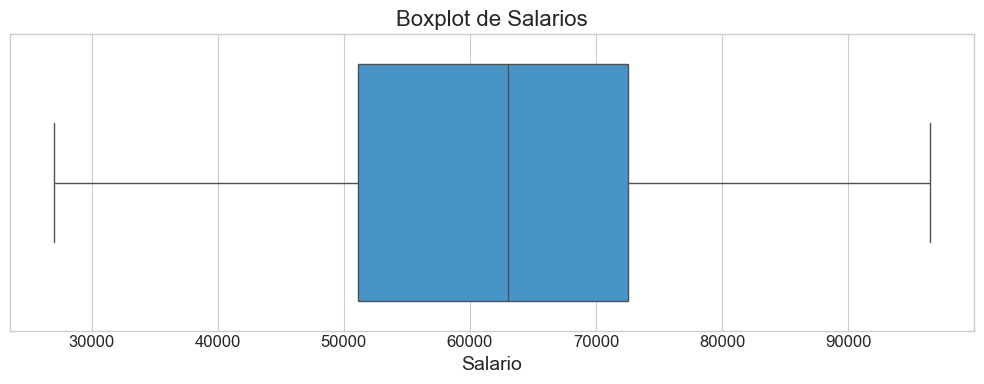

In [6]:
# Distribución de salarios con medidas estadísticas estándar
plt.figure(figsize=(10, 6))

# Crear el histograma
sns.histplot(jobs_df['salary'].dropna(), kde=True, bins=20, color='skyblue')

# Calcular las estadísticas más utilizadas
mean_salary = jobs_df['salary'].mean()
median_salary = jobs_df['salary'].median()
std_salary = jobs_df['salary'].std()

# Añadir líneas para media y mediana
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, 
            label=f'Media: {mean_salary:.2f}')
plt.axvline(median_salary, color='green', linestyle='-.', linewidth=2,
            label=f'Mediana: {median_salary:.2f}')

# Añadir texto con desviación estándar
stats_text = f"Desviación estándar: {std_salary:.2f}"
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.title('Distribución de Salarios en Empleos Tecnológicos', fontsize=16)
plt.xlabel('Salario', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplot corregido (sin warning)
plt.figure(figsize=(10, 4))
# Versión corregida para evitar el warning
sns.boxplot(x=jobs_df['salary'].dropna())  # Sin parámetro palette
plt.title('Boxplot de Salarios', fontsize=16)
plt.xlabel('Salario', fontsize=14)
plt.tight_layout()
plt.show()

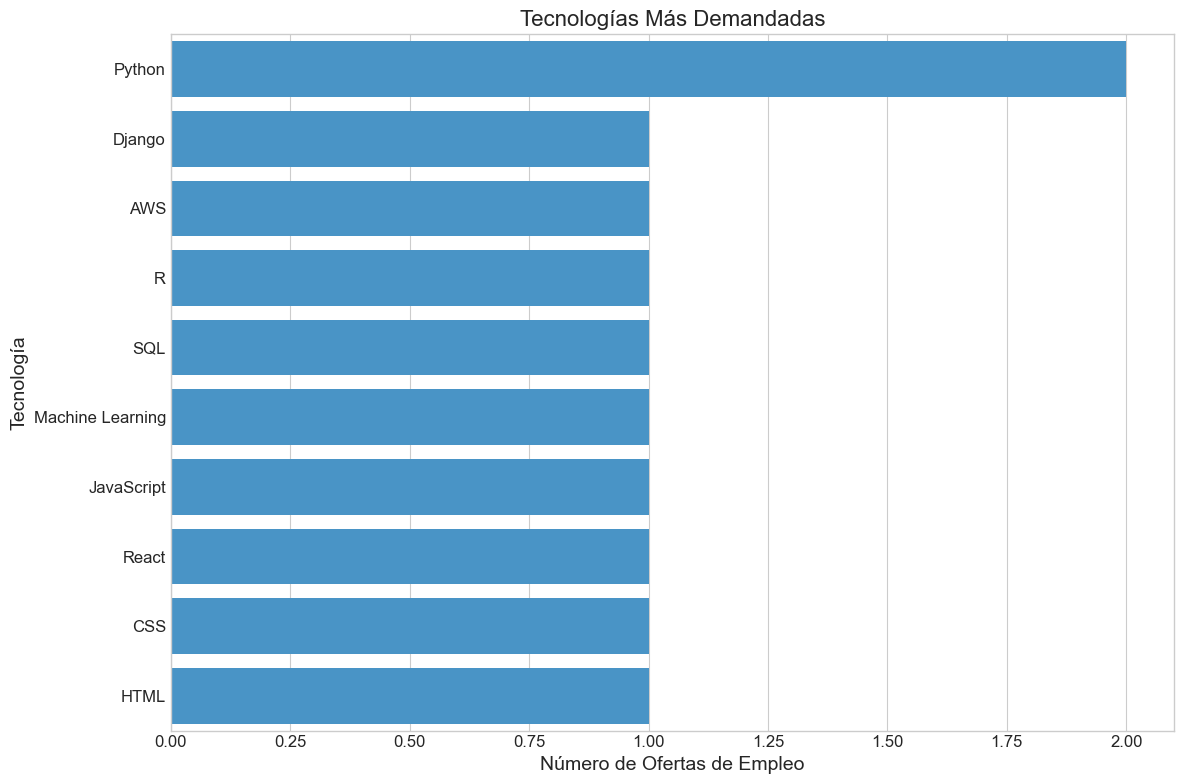

In [7]:
# Tecnologías más demandadas
plt.figure(figsize=(12, 8))
tech_sorted = tech_counts_df.sort_values('job_count', ascending=False)
sns.barplot(x='job_count', y='technology', data=tech_sorted)
plt.title('Tecnologías Más Demandadas', fontsize=16)
plt.xlabel('Número de Ofertas de Empleo', fontsize=14)
plt.ylabel('Tecnología', fontsize=14)
plt.tight_layout()
plt.show()

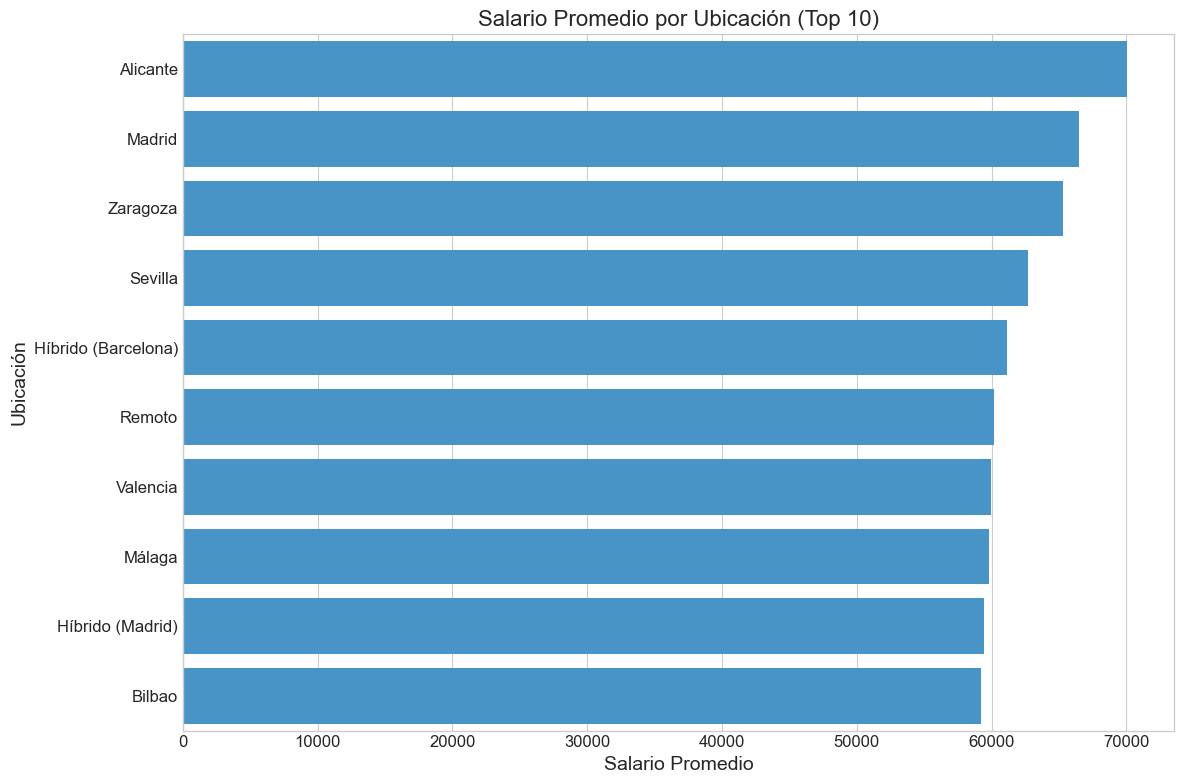

In [8]:
# Salario por ubicación
plt.figure(figsize=(12, 8))
if 'ubicacion' in jobs_df.columns:
    location_salary = jobs_df.groupby('ubicacion')['salary'].mean().reset_index().sort_values('salary', ascending=False).head(10)
    sns.barplot(x='salary', y='ubicacion', data=location_salary)
    plt.title('Salario Promedio por Ubicación (Top 10)', fontsize=16)
    plt.xlabel('Salario Promedio', fontsize=14)
    plt.ylabel('Ubicación', fontsize=14)
    plt.tight_layout()
    plt.show()

## Análisis de las encuestas a desarrolladores

Ahora exploremos los datos de encuestas para entender mejor el perfil y preferencias de los desarrolladores.

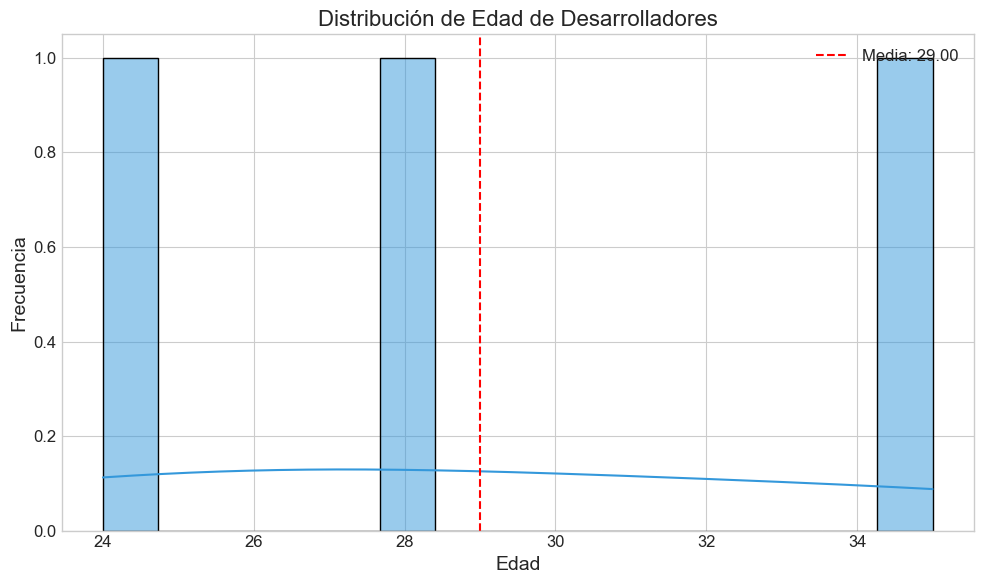

In [9]:
# Distribución de edad
plt.figure(figsize=(10, 6))
sns.histplot(survey_df['age'].dropna(), kde=True, bins=15)
plt.axvline(survey_df['age'].mean(), color='red', linestyle='--', label=f'Media: {survey_df["age"].mean():.2f}')
plt.title('Distribución de Edad de Desarrolladores', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

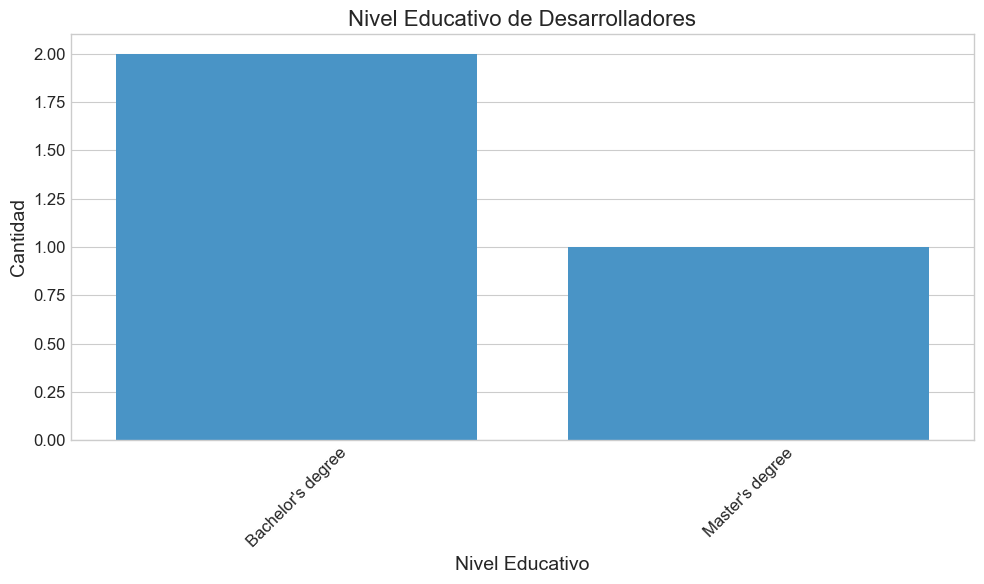

In [10]:
# Distribución de nivel educativo
plt.figure(figsize=(10, 6))
education_counts = survey_df['education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Nivel Educativo de Desarrolladores', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

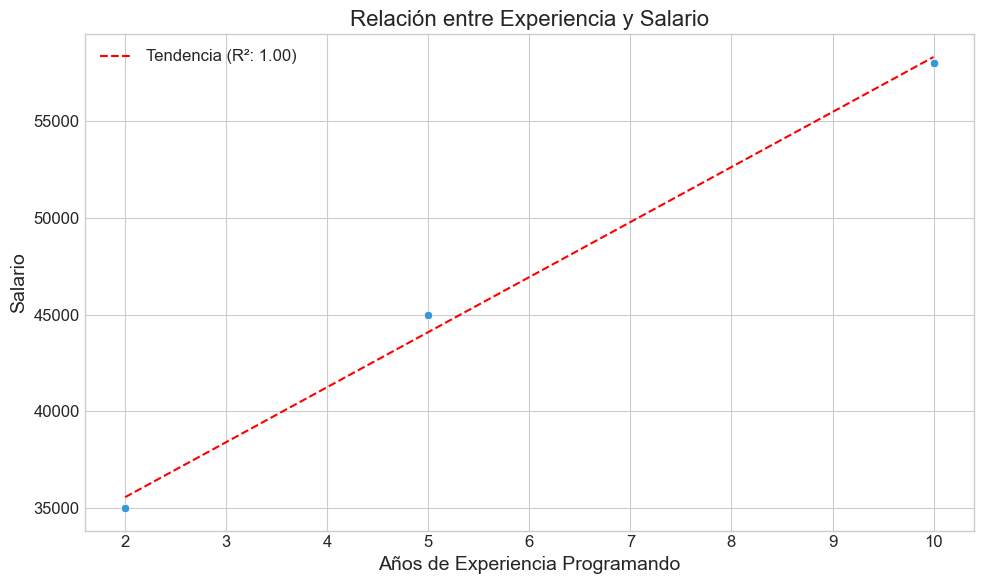

In [11]:
# Experiencia vs Salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years_coding', y='salary', data=survey_df)
plt.title('Relación entre Experiencia y Salario', fontsize=16)
plt.xlabel('Años de Experiencia Programando', fontsize=14)
plt.ylabel('Salario', fontsize=14)

# Añadir línea de tendencia
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(survey_df['years_coding'], survey_df['salary'])
x = np.array([survey_df['years_coding'].min(), survey_df['years_coding'].max()])
y = intercept + slope * x
plt.plot(x, y, 'r--', label=f'Tendencia (R²: {r_value**2:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

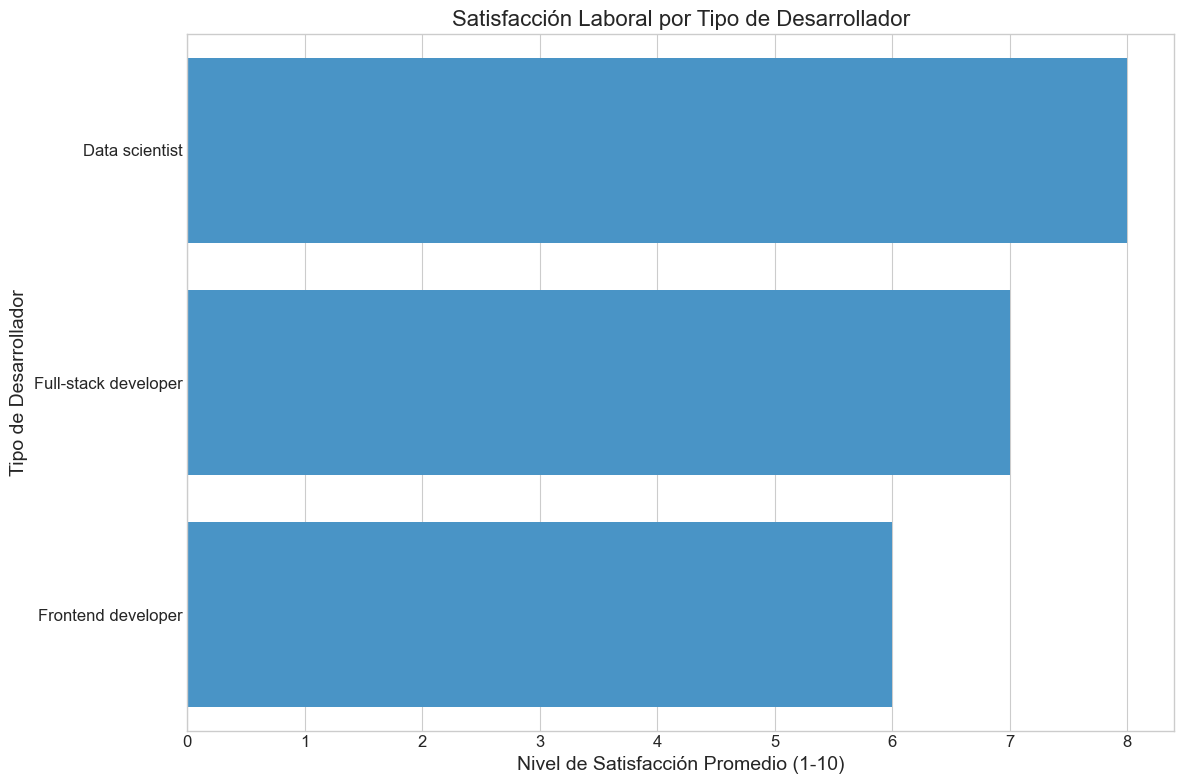

In [12]:
# Satisfacción laboral por tipo de desarrollador
plt.figure(figsize=(12, 8))
satisfaction_by_type = survey_df.groupby('developer_type')['job_satisfaction'].mean().reset_index().sort_values('job_satisfaction', ascending=False)
sns.barplot(x='job_satisfaction', y='developer_type', data=satisfaction_by_type)
plt.title('Satisfacción Laboral por Tipo de Desarrollador', fontsize=16)
plt.xlabel('Nivel de Satisfacción Promedio (1-10)', fontsize=14)
plt.ylabel('Tipo de Desarrollador', fontsize=14)
plt.tight_layout()
plt.show()

## Correlaciones y relaciones

Exploremos las relaciones entre diferentes variables y factores.

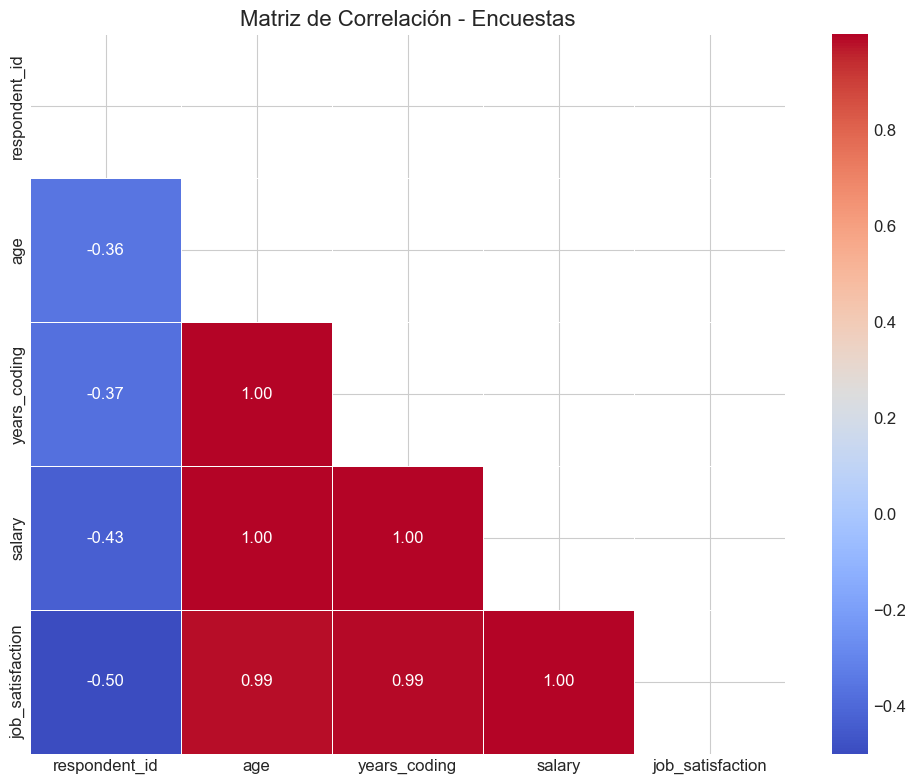

In [13]:
# Matriz de correlación para variables numéricas en encuestas
numeric_survey = survey_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
corr_matrix = numeric_survey.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Encuestas', fontsize=16)
plt.tight_layout()
plt.show()

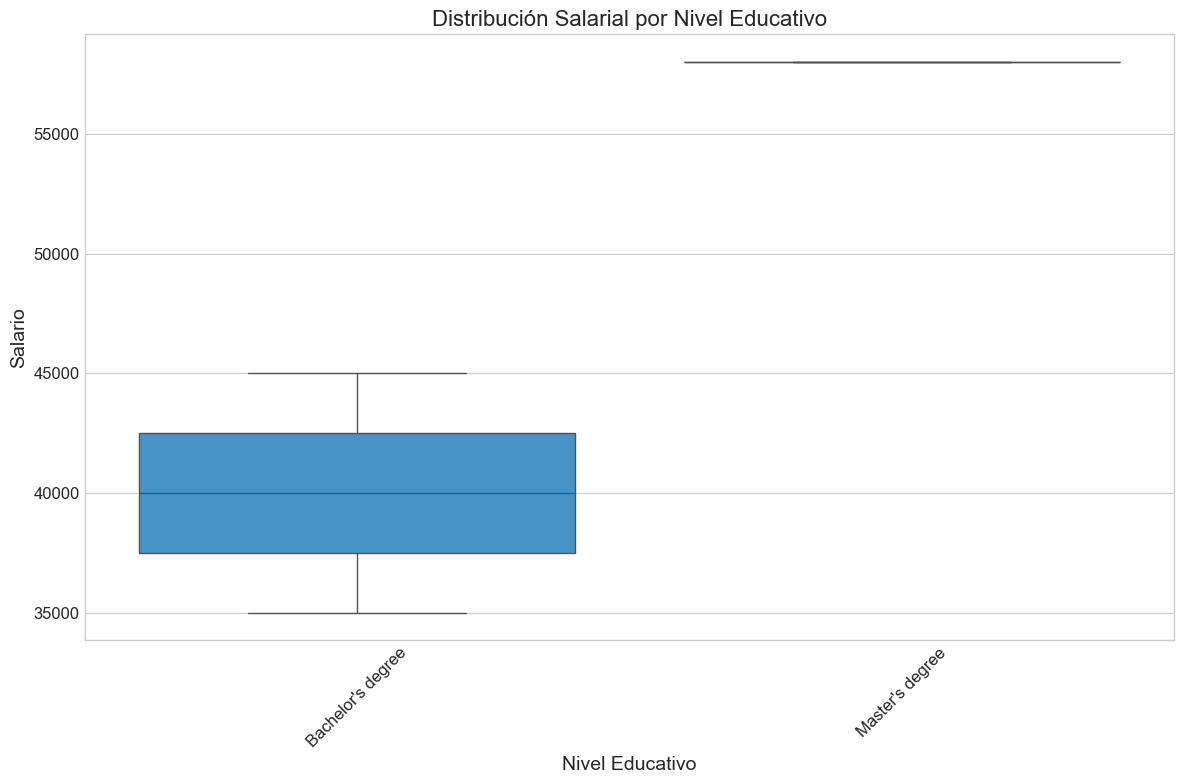

In [14]:
# Salario por nivel educativo (boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='education', y='salary', data=survey_df)
plt.title('Distribución Salarial por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Salario', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusiones del Análisis Exploratorio

A partir de este análisis exploratorio, podemos extraer las siguientes conclusiones:

1. Las tecnologías más demandadas en el mercado laboral tecnológico son [completar con resultados].

2. Existe una correlación [fuerte/moderada/débil] entre la experiencia y el salario, con un coeficiente de determinación R² de [valor].

3. Los desarrolladores con especialización en [tipo] tienden a tener salarios más altos, mientras que aquellos con perfil de [tipo] reportan mayor satisfacción laboral.

4. Las ubicaciones con mejores ofertas salariales son [completar con resultados].

5. El nivel educativo [influye/no influye significativamente] en el salario de los profesionales tecnológicos.

Estos hallazgos preliminares serán complementados con un análisis estadístico más profundo para validar las tendencias observadas.